In [1]:
]activate ../

Activating environment at `~/projects/fleischmann/cortex-nuclei-count/Project.toml`


In [2]:
using ImageFiltering
using Images
using FileIO
using Plots
using StatsBase

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


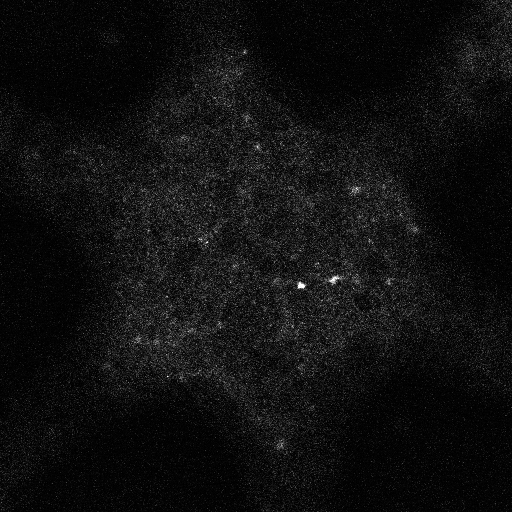

In [3]:
filename = "/Users/mrestrep/projects/borton/calacium_images/example_data/Preprocessedfiles/MAX_6_2_2_24_10x_4minadjust_isa.tif"
filename = "/Users/mrestrep/projects/borton/calacium_images/example_data/image_sequence/6_2_2_24_10x_4minadjust0000.tif"


raw = load(filename)
img = raw.*100

In [ ]:
# raw[raw.<0.01] .=0
# img = raw.*100
# a = maximum(maximum(raw))
# print(a)

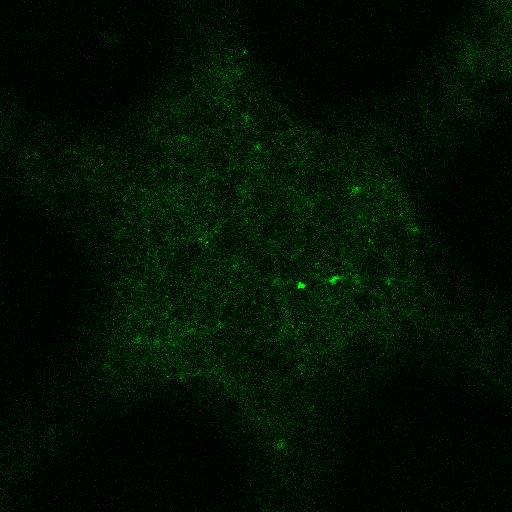

In [4]:
colorview(RGB, zeros(size(raw)), raw*100, zeros(size(raw)))

In [5]:
σscales = [0.3,0.5, 0.7,1.0, 1.5, 2.0, 2.3, 2.5, 3.0, 3.5]
blobs = blob_LoG(raw, σscales)

28789-element Array{BlobLoG{Float64,Float64,2},1}:
 BlobLoG{Float64,Float64,2}(CartesianIndex(14, 2), 0.3, 0.005654390521958665)    
 BlobLoG{Float64,Float64,2}(CartesianIndex(24, 2), 0.3, 0.0074913878347293)      
 BlobLoG{Float64,Float64,2}(CartesianIndex(33, 2), 0.3, 0.004208452059860234)    
 BlobLoG{Float64,Float64,2}(CartesianIndex(39, 2), 0.3, 0.0073890552235468246)   
 BlobLoG{Float64,Float64,2}(CartesianIndex(51, 2), 0.3, 0.003990514439098895)    
 BlobLoG{Float64,Float64,2}(CartesianIndex(60, 2), 0.3, 0.005774006405256301)    
 BlobLoG{Float64,Float64,2}(CartesianIndex(67, 2), 0.3, 0.014619958427794039)    
 BlobLoG{Float64,Float64,2}(CartesianIndex(82, 2), 0.3, 0.0038964069518502746)   
 BlobLoG{Float64,Float64,2}(CartesianIndex(87, 2), 0.3, 0.007458537298030054)    
 BlobLoG{Float64,Float64,2}(CartesianIndex(89, 2), 0.3, 0.007779557302193313)    
 BlobLoG{Float64,Float64,2}(CartesianIndex(98, 2), 0.3, 0.011728477880287228)    
 BlobLoG{Float64,Float64,2}(CartesianIndex(102,

In [6]:
blob_x = zeros(Int64, length(blobs))
blob_y = zeros(Int64, length(blobs))
amplitude = zeros(Float64, length(blobs))
σ = zeros(Float64, length(blobs))

for i=1:length(blobs)
    coord = blobs[i].location
    blob_x[i]  = coord[1]
    blob_y[i] = coord[2]
    amplitude[i] = blobs[i].amplitude
    σ[i] = blobs[i].σ
end

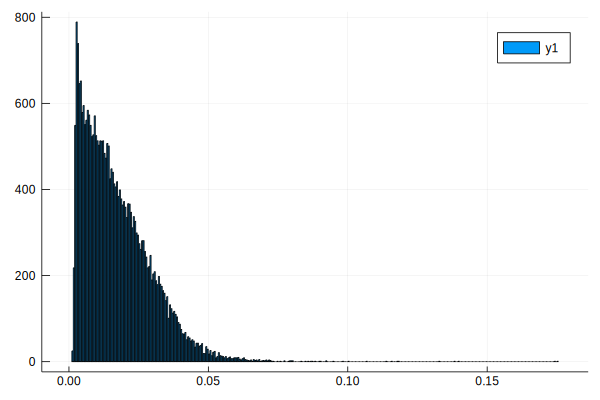

In [9]:
thresh = 0.0

intensity_scale = 20
h = fit(Histogram, amplitude, nbins=500)
bar(midpoints(h.edges...), h.weights)

In [ ]:
t_val = maximum(h.weights) - 100

In [ ]:
t_val

In [ ]:
1t = midpoints(h.edges...)[findall(h.weights.>t_val)] .+ 0.0001
thresh = t[1]

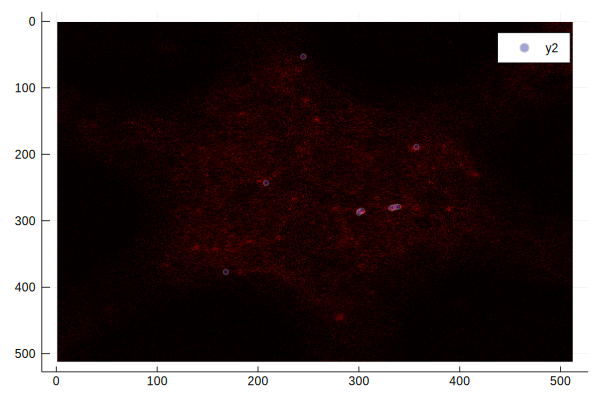

In [15]:
valid = amplitude .> 0.1
# valid = (σ .>=0.5)   .& (amplitude .> 0.05) 
# valid = σ .>= 0.5
cv = colorview(RGB, raw*100, zeros(size(raw)), zeros(size(raw)))
plot(cv)
plot!(blob_y[valid], blob_x[valid], line=:scatter, markersize=10 .*σ[valid], markercolor=:blue, alpha=0.2)

In [ ]:
σ .== 1 
& amplitude .> 0.001 


In [ ]:
amplitude .> 0.001 

In [8]:
using StatsBase